# CS530 Homework 6 Part1

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


#### Question 1. (4 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [2]:
# Your code goes here.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(['target'],axis=1)
y_train = train['target']
X_test =test.drop(['target'],axis=1)
y_test = test['target'] 
model = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy = np.sum(prediction == y_test)/np.shape(prediction)[0]
print('accuracy : {:0.3}'.format(accuracy))
print('Score: {:0.3}'.format(model.score(X_test,y_test)))

accuracy : 0.855
Score: 0.855


b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

AUC = 0.921875


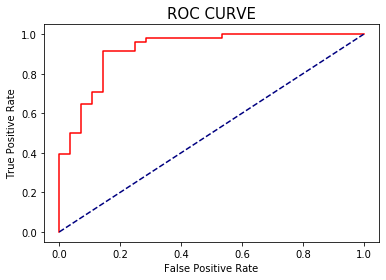

In [3]:
decision = model.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_score = decision , y_true = y_test)
auc = metrics.roc_auc_score(y_score = decision , y_true = y_test)
plt.plot(fpr,tpr,'r')
plt.title("ROC CURVE",size =15)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('AUC =',auc)

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

In [4]:
def roc_curve(predict_probabilities, thresholds, y_true): 
#     TP_list=[]
    FPR_list=[]
    specificity_list=[]
    sensitivity_list=[]
    
    for i in range(np.size(thresholds)):
        pos =  predict_probabilities >= (1/(1+np.exp(-thresholds[i])))
        neg =  predict_probabilities < (1/(1+np.exp(-thresholds[i])))
        
        TP = np.sum(pos & (y_true == 1))
        TN = np.sum(neg & (y_true == 0))
        FP = np.sum(pos & (y_true == 0))
        FN = np.sum(neg & (y_true == 1))
        specificity = TN/(TN+FP)
        sensitivity = TP/(TP+FN)

        specificity_list.append(specificity)
        sensitivity_list.append(sensitivity)
        FPR_list.append(1-specificity)
    plt.plot(FPR_list, sensitivity_list,'r')
    plt.title("ROC CURVE",size =15)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #print('specificity= ',specificity_list,'\n selectivity= ',slectivity_list


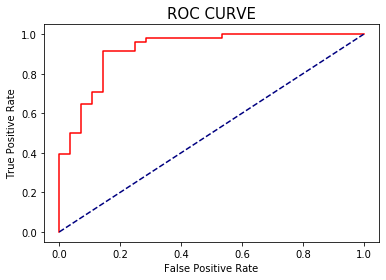

In [5]:
predict_probabilities = model.predict_proba(X_test)[:,1]
roc_curve(predict_probabilities,thresholds,y_test)

#### Question 2 (3 points)

a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. Give a prediction accuracy on the test set.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis('eigen').fit(X_train,y_train)
pred = LDA.predict(X_test)
model_accuracy = LDA.score(X_test,y_test)
model_accuracy

0.8552631578947368

b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

AUC = 0.9196428571428571


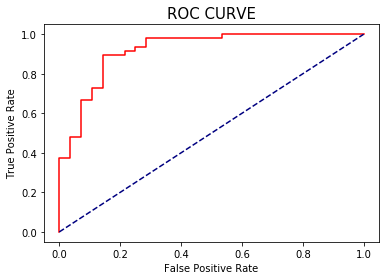

In [7]:
decision = LDA.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_score = decision , y_true = y_test)
auc = metrics.roc_auc_score(y_score = decision , y_true = y_test)
plt.plot(fpr,tpr,'r')
plt.title("ROC CURVE",size =15)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('AUC =',auc)

c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. Which algorithm performs better on this dataset? Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

### logestic regression perform better based on AUC score, probably the assumption of normal distribution of LDA is not working and that is why logestic regression works better